In [1]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv

--2020-12-03 18:47:24--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_prices_train.csv.2’

house_prices_train. 100%[===================>] 449,88K  1,22MB/s    in 0,4s    

2020-12-03 18:47:25 (1,22 MB/s) - ‘house_prices_train.csv.2’ saved [460676/460676]

--2020-12-03 18:47:25--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plai

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib. pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np;
sns.set(style='whitegrid', context='notebook')

In [3]:
data = pd.read_csv('house_prices_train.csv')
test = pd.read_csv('house_prices_test.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
[print(f"{str(td).split()[1]}=> {data.select_dtypes(td).shape[1]}") for td in (object, int, float)];

'object'>=> 43
'int'>=> 35
'float'>=> 3


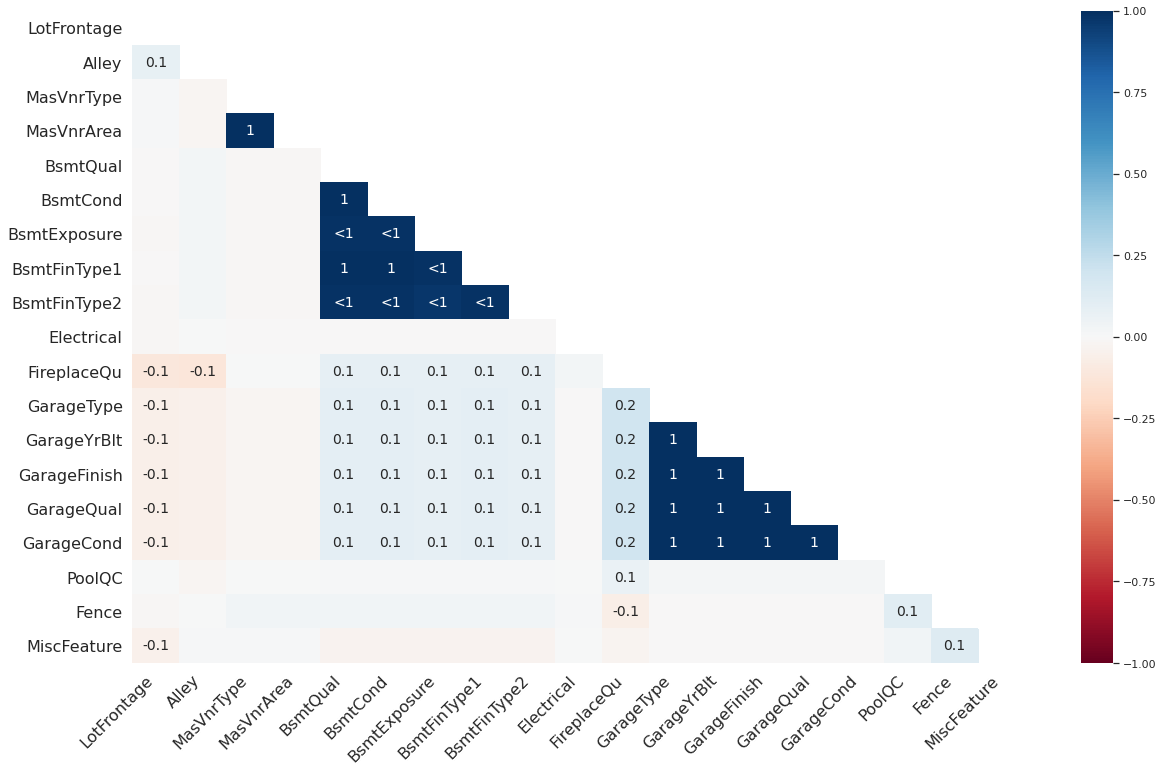

In [7]:
msno.heatmap(data)
plt.show()

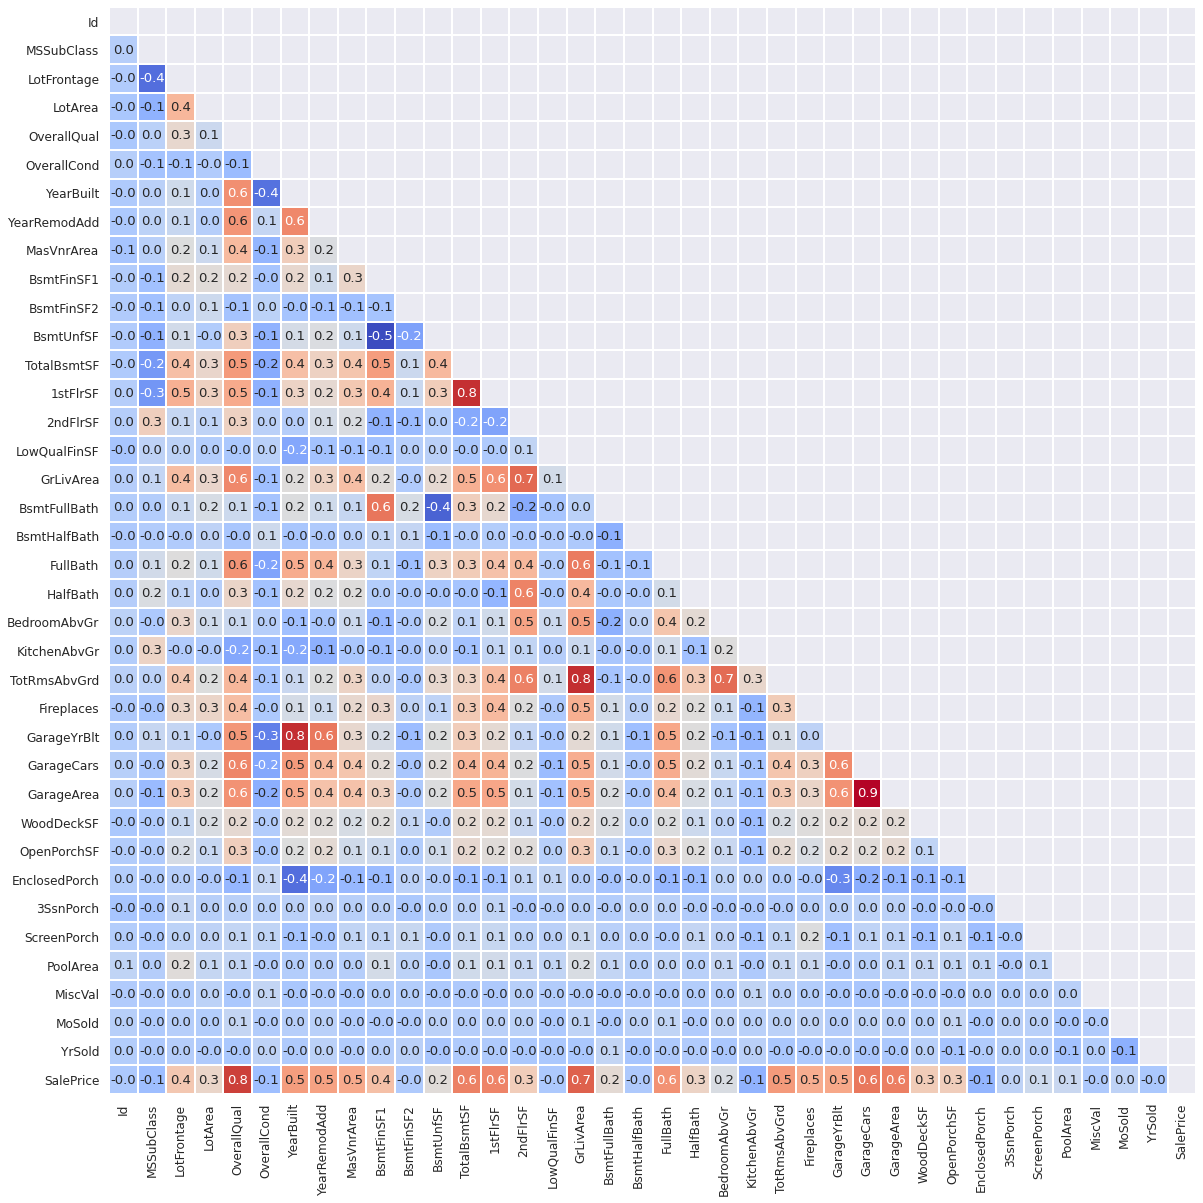

In [8]:
sns.set(font_scale=1.1)
c = data.corr()
mask = np.triu(c.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(c,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

In [9]:
list(dict(data.corr()[['SalePrice']].sort_values('SalePrice', ascending = False).query("SalePrice > 0.1").SalePrice).keys())

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch']

/home/doc/env/lib/python3.7/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


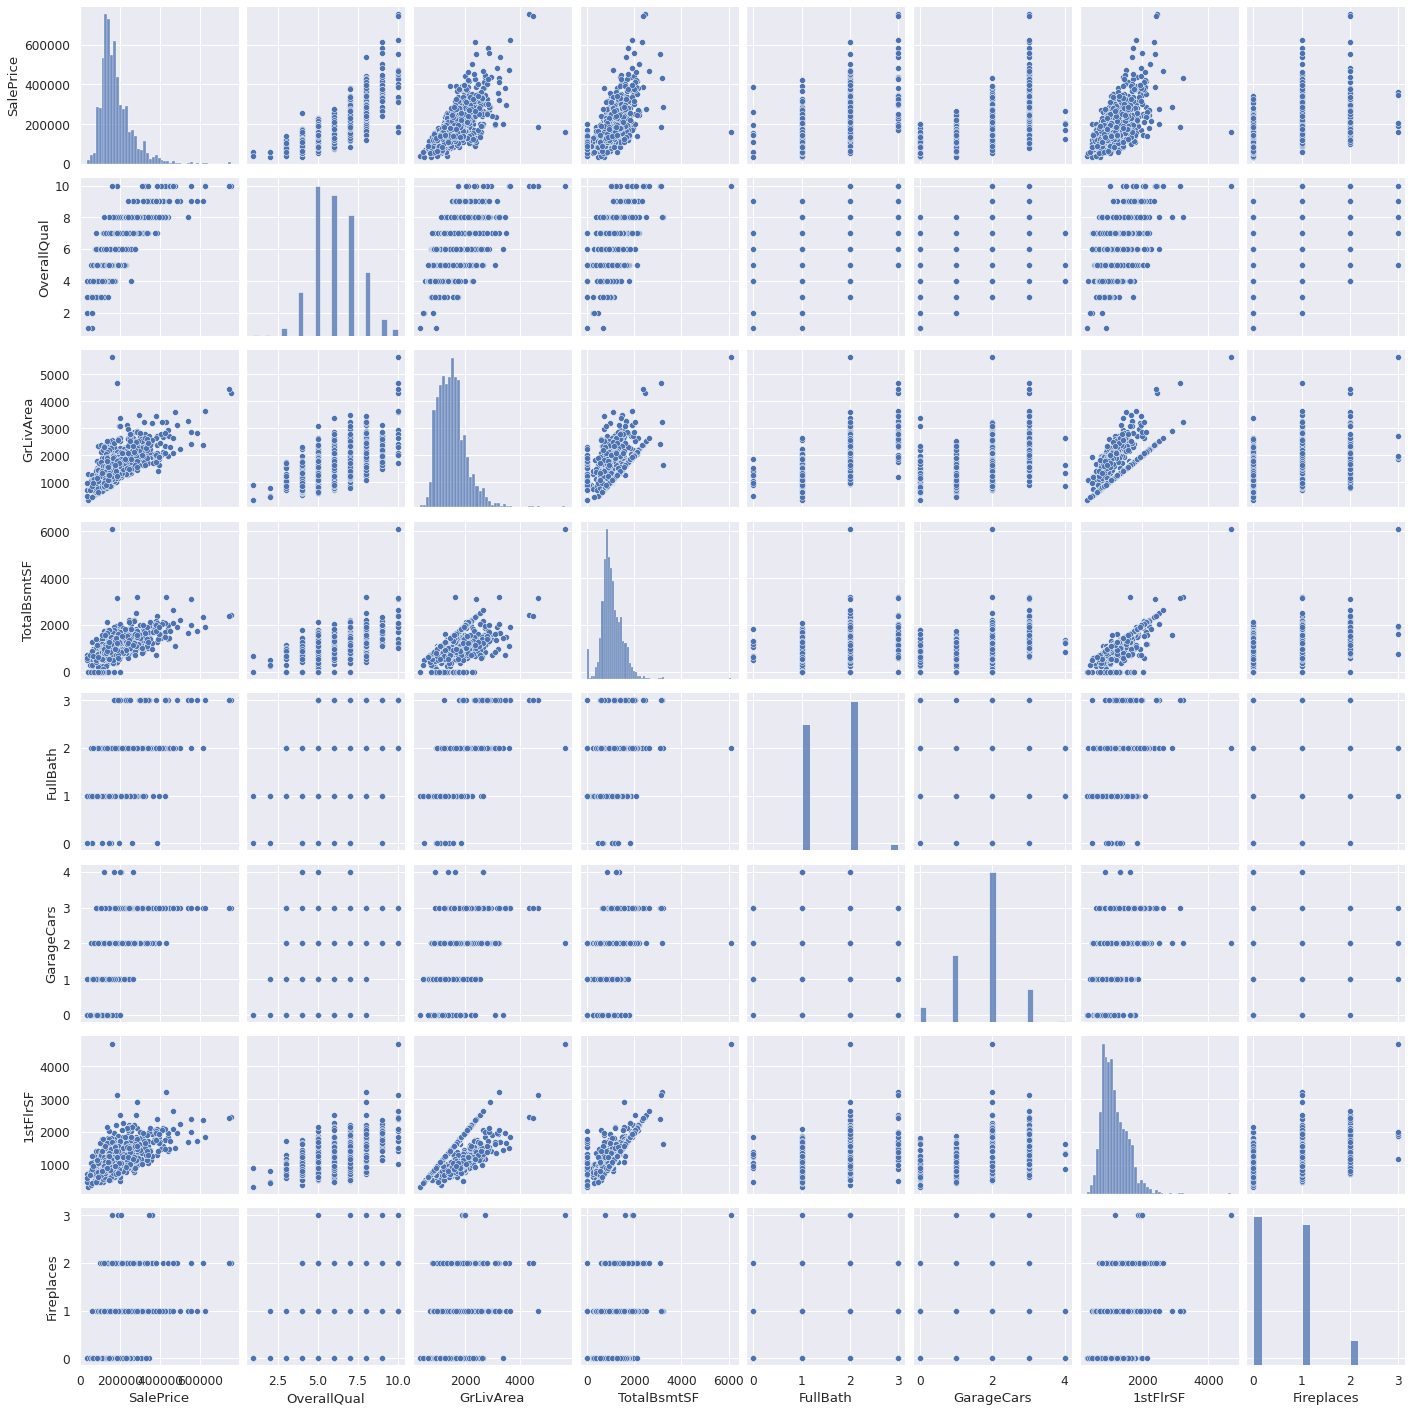

In [10]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'GarageCars', '1stFlrSF', 'Fireplaces']
sns.pairplot(data[cols], size=2.5)
plt.show()

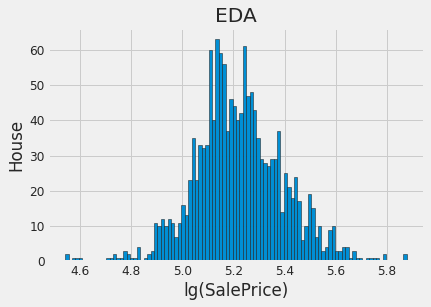

In [11]:
plt.style.use('fivethirtyeight')
plt.hist(np.log10(data[['SalePrice']].values), bins = 100, edgecolor = 'k');
plt.xlabel('lg(SalePrice)'); plt.ylabel('House');
plt.title('EDA');

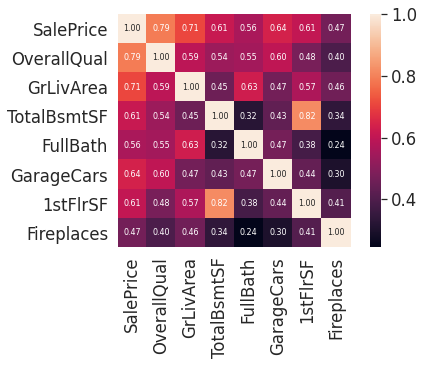

In [12]:
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.02f', annot_kws={'size':8}, yticklabels=cols, xticklabels=cols)
plt.show()

In [13]:
X = data[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'FullBath', 'GarageCars', '1stFlrSF', 'Fireplaces']].values 
y = data[['SalePrice']].values

In [14]:
sc_x = StandardScaler()
X_norm = sc_x.fit_transform(X)

In [15]:
slr = LinearRegression()
slr.fit(X_norm, np.log10(y))

LinearRegression()

In [16]:
x_test = test[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'FullBath', 'GarageCars', '1stFlrSF', 'Fireplaces']]
x_test = x_test.fillna(x_test.mean())
x_test_norm = sc_x.fit_transform(x_test.values)

In [17]:
10 ** slr.predict(X_norm)

array([[187247.12161592],
       [175449.31193964],
       [203519.10727753],
       ...,
       [217379.15746432],
       [117707.29438205],
       [123940.51496186]])

In [18]:
mean_squared_error(y,10 ** slr.predict(X_norm) )

1834926666.8193526

In [19]:
slr.coef_, slr.intercept_

(array([[0.03367209, 0.07189067, 0.02464869, 0.01212657, 0.0364571 ,
         0.00216162, 0.01763418]]),
 array([5.22197896]))

In [20]:
10 ** slr.predict(x_test_norm)

array([[112762.36105712],
       [144377.28377236],
       [159169.85339607],
       ...,
       [147913.73020922],
       [102885.40952129],
       [239261.99300054]])

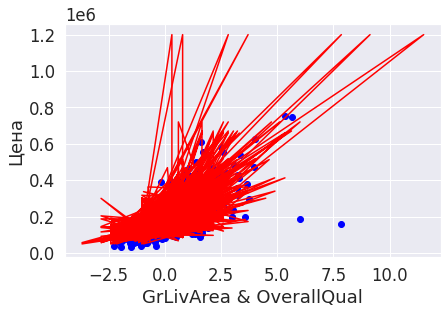

In [21]:
plt.scatter(np.array([[i[0]] for i in X_norm]), y, c='blue')
plt.plot(X_norm,  10 ** slr.predict(X_norm), color='red')
plt.xlabel('GrLivArea & OverallQual')
plt.ylabel('Цена')
plt.show()

In [22]:
def save(feature, result:pd.DataFrame, name:np.ndarray) -> None:
    output_multi = pd.DataFrame({'Id': feature.Id, 'SalePrice': result})
    output_multi.to_csv(f'{name}_submission.csv', index=False)
    print("=> Your submission was successfully saved! <=")

In [23]:
save(test, np.array([i[0] for i in 10 ** slr.predict(x_test_norm)]), 'test_regression')

=> Your submission was successfully saved! <=
